In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
plt.style.use('ggplot')

In [7]:
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['axes.facecolor']='white'
mpl.rcParams['axes.edgecolor']='k'
mpl.rcParams['axes.linewidth']=3
mpl.rcParams['font.size']=16
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['text.color'] = 'k'
#mpl.rcParams['xtick.major.width'] = 2
#mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.major.size'] = 3.6
mpl.rcParams['ytick.major.size'] = 3.6
mpl.rcParams['xtick.color']='k'
mpl.rcParams['ytick.color']='k'
mpl.rcParams['axes.labelcolor']='k'

In [52]:
def makeCmap(hexColour,name,zeroColour='#FFFFFF'):
    r0,g0,b0=mpl.colors.hex2color(zeroColour)
    r,g,b=mpl.colors.hex2color(hexColour)
    cdict = {'red':   ((0.0, r0, r0),
                   (1.0, r, r)),
         'green': ((0.0, g0, g0),
                   (1.0, g, g)),
         'blue':  ((0.0, b0, b0),
                   (1.0, b, b))
        }
    cmap = mpl.colors.LinearSegmentedColormap(name,cdict)
    return cmap

In [64]:
files=['darkMatter','galaxies','blackHoles']
colours=['#011627','#FF9F1C','#E71D36']

In [100]:
def plotBackground(thisPlot,x0,y0,colour):
    cmap=makeCmap('#730F1C','name')
    yMin=y0*np.power(x0/1e20,2)
    yMax=y0*np.power(x0/1e-20,2)
    nColours=30
    change=0.1
    for i in range(nColours-1):
        thisPlot.fill([1e-20,1e-20,1e20],[yMax*change**(i),yMin*change**(i),yMin*change**(i)],c=cmap((i+1)/nColours))
    return thisPlot

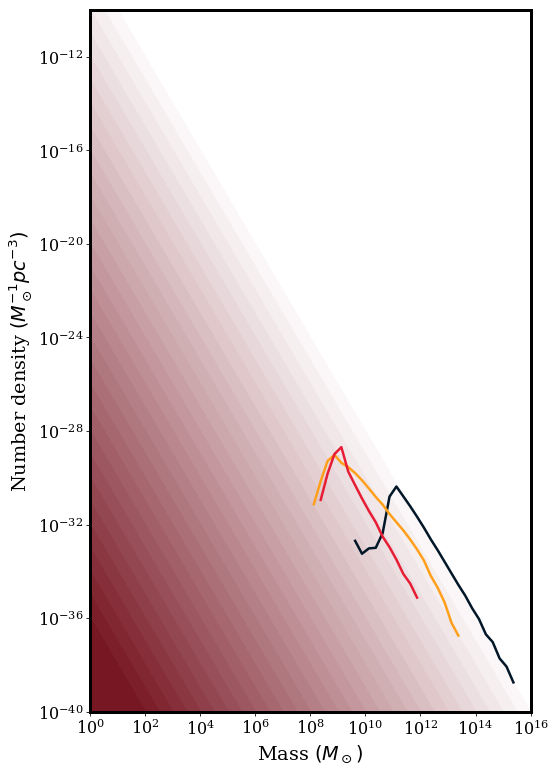

In [101]:
fig = plt.figure(figsize=(8,11))
nPlot = plt.gca()
for index,field in enumerate(files):
    data=np.genfromtxt('data/'+field+'.txt')
    nPlot.plot(data[0,:],data[1,:],c=colours[index])
nPlot=plotBackground(nPlot,1e16,1e-40,'k')
nPlot.set_xscale('log')
nPlot.set_yscale('log')
nPlot.set_ylim(1e-40,1e-10)
nPlot.set_xlim(1,1e16)
nPlot.set_xlabel(r'Mass $(M_\odot)$')
nPlot.set_ylabel(r'Number density $(M_\odot^{-1} pc^{-3})$')
plt.tight_layout()
plt.savefig('plot.pdf')
plt.show()